In [39]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

### Importing and Preprocessing Data

In [73]:
TRAIN_DATASET = "asl_dataset/Train"
TEST_DATASET = "asl_dataset/Test"
MODEL_SAVE_PATH = "models"
OUTPUT_PATH = "outputs"

In [41]:
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)

In [74]:
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [42]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

In [43]:
label_map = {
    "A": "fist",   # closed fist
    "B": "palm",   # open hand
    "S": "sos"   # fist with thumb
}

In [44]:
data = []
labels = []

In [45]:
valid_classes = list(set(label_map.values()))

In [46]:
valid_classes

['fist', 'palm', 'sos']

In [47]:
for i in sorted(os.listdir(TRAIN_DATASET)):
    if i in label_map:   
        for j in os.listdir(os.path.join(TRAIN_DATASET, i)):
            data_aux = []
            img = cv2.imread(os.path.join(TRAIN_DATASET,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for z in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[z].x
                        y = hand_landmarks.landmark[z].y
                        data_aux.append(x)
                        data_aux.append(y)
                data.append(data_aux)
                labels.append(label_map[i]) 

In [48]:
data

[[0.6874337196350098,
  0.6271227598190308,
  0.5162051916122437,
  0.5789723992347717,
  0.38317084312438965,
  0.44684043526649475,
  0.3354688882827759,
  0.29810547828674316,
  0.35099878907203674,
  0.179961159825325,
  0.4389663338661194,
  0.2869652509689331,
  0.41349297761917114,
  0.16640923917293549,
  0.4354500472545624,
  0.2826518714427948,
  0.45565059781074524,
  0.34327879548072815,
  0.5293770432472229,
  0.2657768130302429,
  0.5104852914810181,
  0.14936792850494385,
  0.5243043303489685,
  0.29899659752845764,
  0.5395412445068359,
  0.3439442813396454,
  0.6245682835578918,
  0.2633572518825531,
  0.6109850406646729,
  0.14513640105724335,
  0.6121610999107361,
  0.29295244812965393,
  0.6245381236076355,
  0.35147348046302795,
  0.7329660654067993,
  0.2761269807815552,
  0.7079710960388184,
  0.17001165449619293,
  0.6952022910118103,
  0.2764310836791992,
  0.7008804082870483,
  0.33590084314346313],
 [0.3822672367095947,
  0.7967923879623413,
  0.2793117761611

In [49]:
labels

['fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 'fist',
 

In [50]:
set(labels)

{'fist', 'palm', 'sos'}

In [51]:
import pandas as pd

In [52]:
df = pd.DataFrame(data)
df['label'] = labels

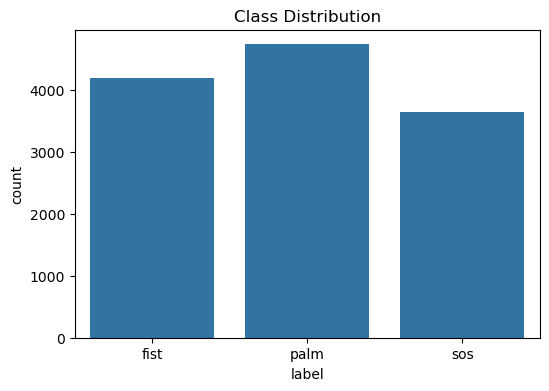

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label")
plt.title("Class Distribution")
plt.savefig("outputs/class_dist.png")
plt.show()

In [55]:
print("Missing values in dataset:")
print(df.isnull().sum().sum())

Missing values in dataset:
0


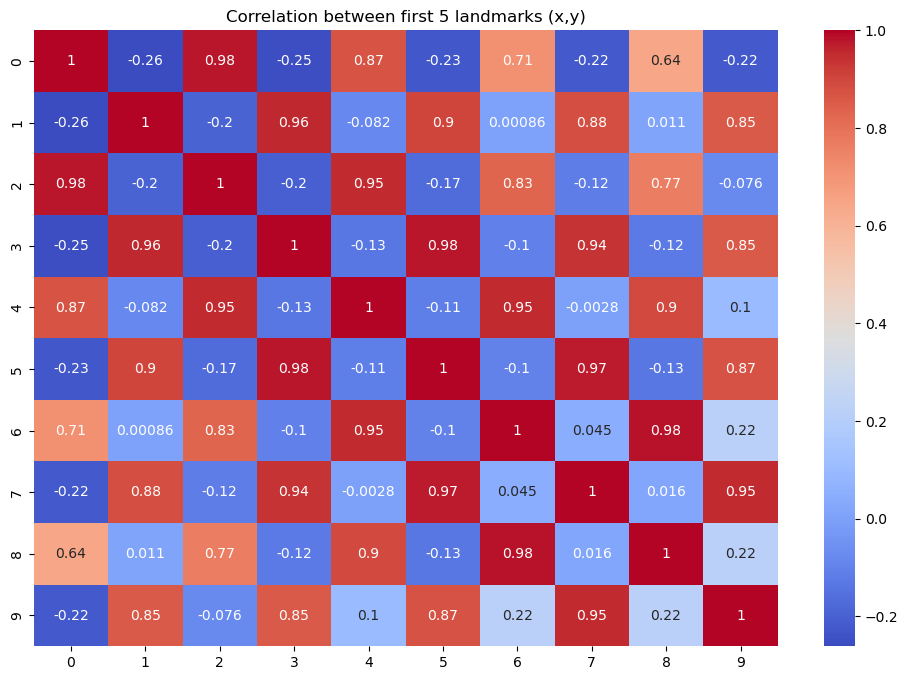

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,:10].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between first 5 landmarks (x,y)")
plt.show()

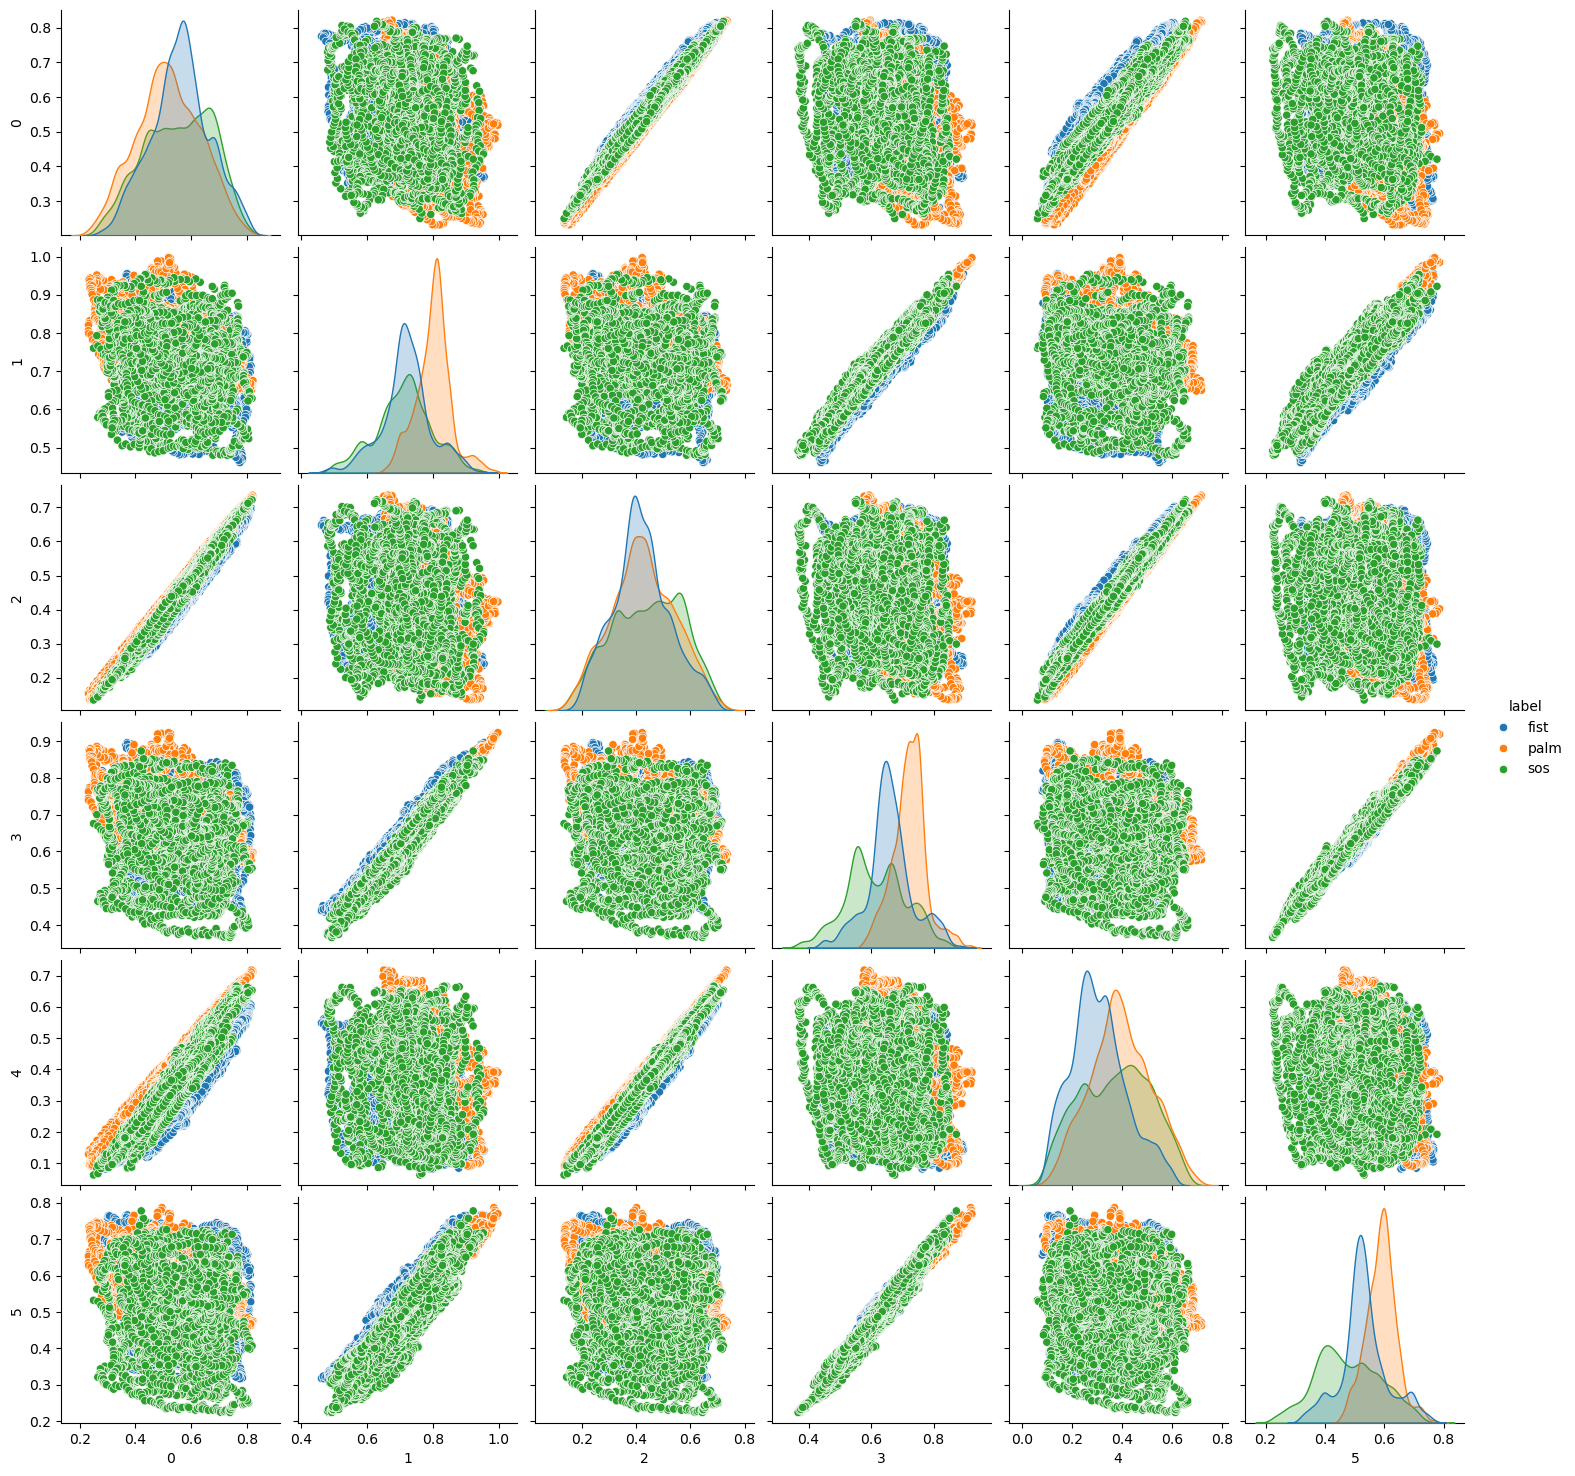

In [58]:
sns.pairplot(df.iloc[:,:6].assign(label=df["label"]), hue="label")
plt.show()

In [59]:
with open("outputs/data.pickle", "wb") as f:
    pickle.dump({"data":data,"labels":labels}, f)

In [65]:
from sklearn.preprocessing import StandardScaler

In [61]:
X = np.array(data)
y = np.array(labels)

In [62]:
X

array([[0.68743372, 0.62712276, 0.51620519, ..., 0.27643108, 0.70088041,
        0.33590084],
       [0.38226724, 0.79679239, 0.27931178, ..., 0.59653568, 0.42508265,
        0.62329704],
       [0.40449443, 0.86484164, 0.30278292, ..., 0.67412543, 0.45226014,
        0.69310212],
       ...,
       [0.50845188, 0.82418501, 0.42136073, ..., 0.62215644, 0.56797034,
        0.63943452],
       [0.52338988, 0.82486022, 0.43030733, ..., 0.62195629, 0.57294047,
        0.64158803],
       [0.52966142, 0.82544255, 0.43902084, ..., 0.62956405, 0.58231354,
        0.64797932]])

In [63]:
y

array(['fist', 'fist', 'fist', ..., 'sos', 'sos', 'sos'], dtype='<U4')

### Model Training and Evaluation

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [68]:
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "SVC": SVC(random_state=42)
}

In [75]:
results = {}


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [80]:
for name, model in models.items():
    if name in ["logistic_regression", "svc"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        save_dict = {"model": model, "scaler": scaler}
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        save_dict = {"model": model}

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "conf_matrix": cm,
        "class_report": cr
    }

    model_file = os.path.join(MODEL_SAVE_PATH, f"{name}_gesture.pkl")
    with open(model_file, "wb") as f:
        pickle.dump(save_dict, f)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    cm_file = os.path.join(OUTPUT_PATH, f"{name}_confusion_matrix.png")
    plt.savefig(cm_file)
    plt.close()

    cr_file = os.path.join(OUTPUT_PATH, f"{name}_classification_report.txt")
    with open(cr_file, "w") as f:
        f.write(f"Model: {name}\n")
        f.write(f"Accuracy: {acc:.4f}\n")
        f.write(f"Precision: {prec:.4f}\n")
        f.write(f"Recall: {rec:.4f}\n")
        f.write(f"F1 Score: {f1:.4f}\n\n")
        f.write("Full Classification Report:\n")
        f.write(cr)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print("Confusion Matrix saved to:", cm_file)
    print("Classification Report saved to:", cr_file)
    print("-"*50)

Model: Logistic Regression
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
Confusion Matrix saved to: outputs\Logistic Regression_confusion_matrix.png
Classification Report saved to: outputs\Logistic Regression_classification_report.txt
--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9976 | Precision: 0.9976 | Recall: 0.9976 | F1: 0.9976
Confusion Matrix saved to: outputs\Decision Tree_confusion_matrix.png
Classification Report saved to: outputs\Decision Tree_classification_report.txt
--------------------------------------------------
Model: Random Forest
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
Confusion Matrix saved to: outputs\Random Forest_confusion_matrix.png
Classification Report saved to: outputs\Random Forest_classification_report.txt
--------------------------------------------------
Model: SVC
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000
Confusion Matrix saved to: outputs\SV

### Hyperparameter Tuning (Logistic Regression)

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [ ]:
param_dist = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": loguniform(0.001, 100),
    "solver": ["liblinear", "saga"],
    "max_iter": [1000]
}

In [83]:
random_cv = RandomizedSearchCV(LogisticRegression(n_jobs=-1, random_state=42),
    param_distributions=param_dist, n_iter=30, cv=3, n_jobs=-1, verbose=1,
    scoring="accuracy", random_state=42
)

In [84]:
random_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\theof\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
36 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\theof\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\theof\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\theof\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_s

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000224755B6AD0>,
                                        'max_iter': [1000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [85]:
best_model = random_cv.best_estimator_

In [86]:
y_pred_best = best_model.predict(X_test_scaled)

In [87]:
y_pred_best

array(['sos', 'fist', 'sos', ..., 'fist', 'fist', 'sos'], dtype='<U4')

In [88]:
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best, average="weighted", zero_division=0)
rec_best = recall_score(y_test, y_pred_best, average="weighted", zero_division=0)
f1_best = f1_score(y_test, y_pred_best, average="weighted", zero_division=0)
cm_best = confusion_matrix(y_test, y_pred_best)
cr_best = classification_report(y_test, y_pred_best)

In [89]:
print("Best Logistic Regression")
print(f"Accuracy: {acc_best:.4f} | Precision: {prec_best:.4f} | Recall: {rec_best:.4f} | F1: {f1_best:.4f}")

Best Logistic Regression
Accuracy: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | F1: 1.0000


In [90]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Best Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
cm_file = os.path.join(OUTPUT_PATH, "best_model_confusion_matrix.png")
plt.savefig(cm_file)
plt.close()

In [91]:
cr_file = os.path.join(OUTPUT_PATH, "best_model_classification_report.txt")
with open(cr_file, "w") as f:
    f.write("Best Logistic Regression\n")
    f.write(f"Accuracy: {acc_best:.4f}\n")
    f.write(f"Precision: {prec_best:.4f}\n")
    f.write(f"Recall: {rec_best:.4f}\n")
    f.write(f"F1 Score: {f1_best:.4f}\n\n")
    f.write("Full Classification Report:\n")
    f.write(cr_best)

In [93]:
best_model_file = os.path.join(MODEL_SAVE_PATH, "best_model_gesture.pkl")
with open(best_model_file, "wb") as f:
    pickle.dump({"model": best_model, "scaler": scaler}, f)